# Diabetes

<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/Diabetics.png" width=1000>


Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

In [1]:
path = "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/diabetes_1.csv"

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error, mean_squared_error
from sklearn.linear_model import ElasticNet


import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.max_columns = 1000
pd.set_option('future.no_silent_downcasting', True)

df = pd.read_csv(path)

In [3]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.900,0.171,63,0
764,2,122,70,27,0,36.800,0.340,27,0
765,5,121,72,23,112,26.200,0.245,30,0
766,1,126,60,0,0,30.100,0.349,47,1


In [4]:
X = df.drop(columns=['Glucose'])

y = df['Glucose']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=667, )

In [5]:
model = LogisticRegression()

model.fit(X_train, y_train)

c:\Users\Grand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
y_pred  = model.predict(X_test)

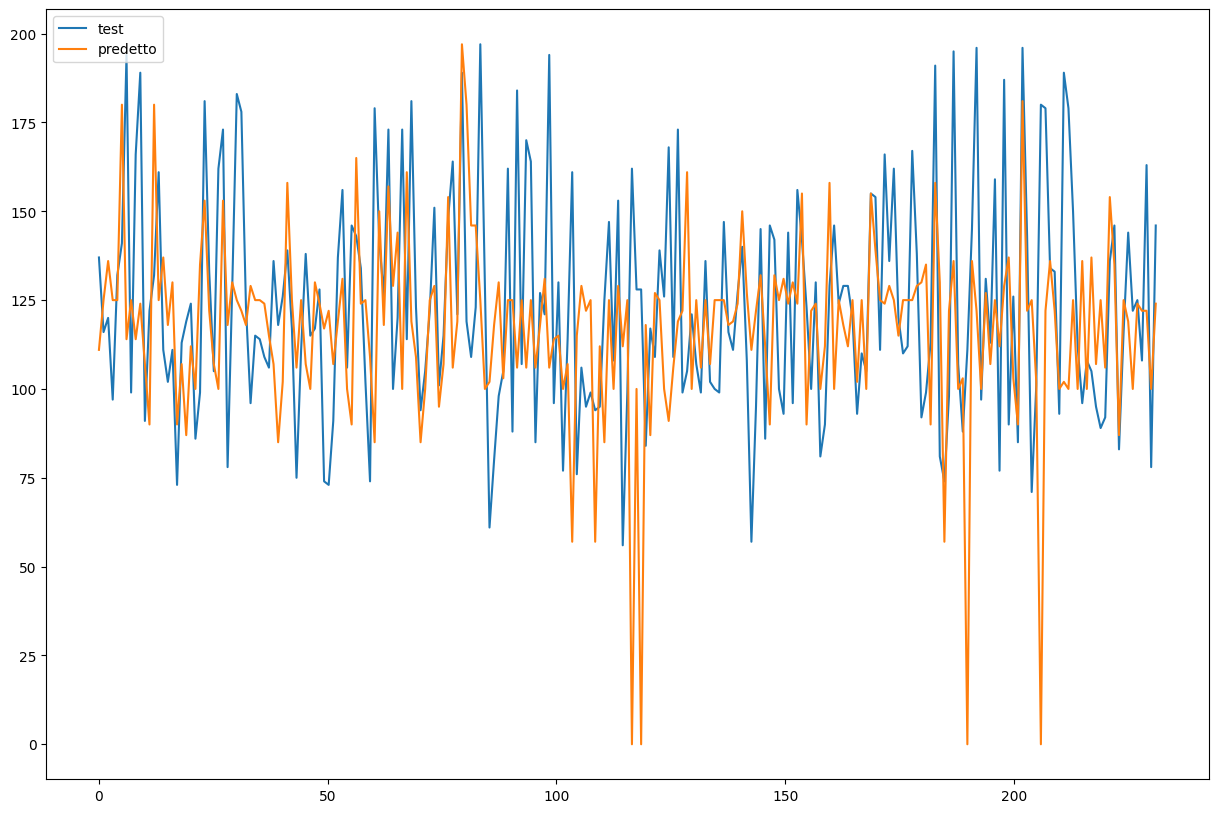

In [7]:
length = y_pred.shape[0] # 30
x = np.linspace(0,length,length)

plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [8]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
# see how model confusion matrix varies with threshold
bestmodel = model

#labels = y_test.sort_values().drop_duplicates().to_list()
labels = ['No Diabetics','Diabetics']

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [6,6])
    sns.heatmap(conf, cmap='Blues', annot=True, square=True, cbar=False,
           xticklabels=labels,
           yticklabels=labels)
    plt.xlabel('Actual')
    plt.ylabel('Prediction')
    plt.show() # This is part that needs to be added to fix the issue

# Let's see how our confusion matrix changes with changes to the cutoff!
from ipywidgets import interactive, FloatSlider
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…